In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# Identifing person using Cosine Similarities

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
from keras.models import model_from_json
model.load_weights('/content/drive/My Drive/Colab Notebooks/vgg_face_weights.h5')

In [0]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
''' 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

'''
def findEuclideanDistance(a,b):
  return np.linalg.norm(a-b)

In [0]:
D_representation = model.predict(preprocess_image('/content/drive/My Drive/Colab Notebooks/20dhoni.jpg'))[0,:]
K_representation = model.predict(preprocess_image('/content/drive/My Drive/Colab Notebooks/vk.jpg'))[0,:]

In [0]:
epsilon1 = 0.40 #cosine similarity
epsilon2 = 120 #euclidean distance

def verifyFace(test):
 D_representation = model.predict(preprocess_image('/content/drive/My Drive/Colab Notebooks/20dhoni.jpg'))[0,:]
 K_representation = model.predict(preprocess_image('/content/drive/My Drive/Colab Notebooks/vk.jpg'))[0,:]
 
 cosine_similarity_D = findCosineDistance(D_representation, test)
 cosine_similarity_K = findCosineDistance(K_representation, test)
 euclidean_distance_D = findEuclideanDistance(D_representation, test)
 euclidean_distance_K = findEuclideanDistance(K_representation, test)
 
 print(cosine_similarity_D,euclidean_distance_D)
 print(cosine_similarity_K,euclidean_distance_K)
 '''
 if(cosine_similarity_D < epsilon and cosine_similarity_D > cosine_similarity_K):
  print("Dhoni")
 if(cosine_similarity_K < epsilon and cosine_similarity_K > cosine_similarity_D):
  print("Kholi")
 else:
  print("unverified! No match")
 
 if (cosine_similarity_D<cosine_similarity_K):
   print("Dhoni")
 else:
   print("Kholi")

'''
 if (cosine_similarity_D < epsilon1  and euclidean_distance_D < epsilon2):
   print("Dhoni")
 if (cosine_similarity_K < epsilon1  and euclidean_distance_K < epsilon2):
   print("Kholi")
 else:
   print("unverified! No match")


test = model.predict(preprocess_image('d.jpg'))[0,:]
verifyFace(test)

0.6221129894256592 0.065556
0.6681487560272217 0.079408154
unverified! No match


# Face Detection in Image

In [0]:
pip install mtcnn

In [0]:
import mtcnn
# print version
print(mtcnn.__version__)

In [0]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
#import tensorflow as tf

DETECTOR = MTCNN()


def detect_face_boundaries(filename):
  pixels = pyplot.imread(filename)
  faces = DETECTOR.detect_faces(pixels)
  return faces
# for face in faces:
# 	print(face)

#detect_face_boundaries('try.jpg')

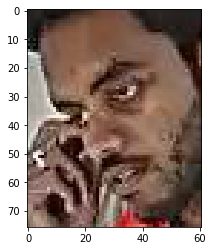

In [0]:
from PIL import Image
import matplotlib.pyplot as plt


filename = 'try.jpg'
result_list = detect_face_boundaries(filename)
im = Image.open('try.jpg')
lst1 = []
#for result in result_list:
x,y,width,height = result_list[0]['box']
cropped = im.crop(( x, y, x+width, y+height))
plt.imshow(cropped)






[{'box': [505, 298, 61, 76], 'confidence': 0.9976828098297119, 'keypoints': {'left_eye': (516, 334), 'right_eye': (538, 325), 'nose': (524, 344), 'mouth_left': (525, 359), 'mouth_right': (546, 352)}}, {'box': [481, 32, 28, 47], 'confidence': 0.9559575915336609, 'keypoints': {'left_eye': (490, 52), 'right_eye': (502, 46), 'nose': (501, 58), 'mouth_left': (499, 70), 'mouth_right': (505, 65)}}, {'box': [702, 159, 17, 19], 'confidence': 0.7812260985374451, 'keypoints': {'left_eye': (705, 165), 'right_eye': (714, 165), 'nose': (709, 171), 'mouth_left': (706, 174), 'mouth_right': (713, 174)}}]


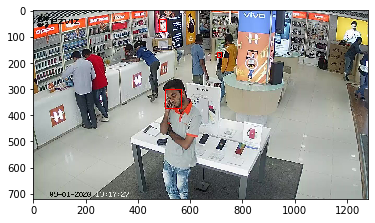

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

def draw_image_with_boxes(filename, result_list):
  data = pyplot.imread(filename)
  pyplot.imshow(data)
  ax = pyplot.gca()
  print(result_list)

  for result in result_list:
    x,y,width,height = result['box']
    rect = Rectangle((x,y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    #plt.text(x,y,result['confidence'],bbox=dict(facecolor='white', alpha=0.3))
  pyplot.show()
filename = 'try.jpg'
draw_image_with_boxes(filename,detect_face_boundaries(filename))

# Video to images using frames




In [0]:
import cv2 
vidcap = cv2.VideoCapture('/content/drive/My Drive/Untitled folder/vid1_30sec.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    vidcap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    vidcap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    hasFrames,image = vidcap.read()
    if hasFrames:
        #cv2.imwrite("/content/drive/My Drive/Untitled folder/Video to images/image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1/25 
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [0]:
#https://www.geeksforgeeks.org/extract-images-from-video-in-python/


# Importing all necessary libraries 
import cv2 
import os 

# Read the video from specified path 
cam = cv2.VideoCapture("/content/drive/My Drive/Untitled folder/vid1_30sec.mp4") 
 
currentframe = 0

while(True): 
	
	# reading from frame 
	ret,frame = cam.read() 

	if ret: 
		# if video is still left continue creating images 
		name = '/content/drive/My Drive/Untitled folder/Video to images/frame' + str(currentframe) + '.jpg'
		#print ('Creating...' + name) 

		# writing the extracted images 
		cv2.imwrite(name, frame) 

		# increasing counter so that it will 
		# show how many frames are created 
		currentframe += 1
	else: 
		break

# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 


# Person detection in Image

In [0]:
pip install imageai --upgrade

## Model

In [0]:
#reffered from https://imageai.readthedocs.io/en/latest/detection/index.html
#reffered from #https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/

from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector_object = ObjectDetection()
detector_object.setModelTypeAsYOLOv3()
detector_object.setModelPath( os.path.join(execution_path , "/content/drive/My Drive/Colab Notebooks/yolo.h5"))
detector_object.loadModel(detection_speed = 'fast') 
custom = detector_object.CustomObjects(person=True)

def object_detector(filename):
  detections = detector_object.detectCustomObjectsFromImage( custom_objects=custom, 
                                                   input_image=os.path.join(execution_path , filename), 
                                                   output_image_path=os.path.join(execution_path , "image3new-custom.jpg"), 
                                                   #output_type = 'array',
                                                   minimum_percentage_probability=50
                                                   )
  return detections


## For one image

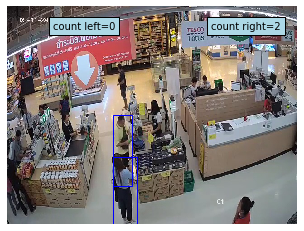

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image

def draw_image_with_boxes_object(filename, result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    
    
    #print(result_list)
    count1 = 0
    count2 = 0
    #count3 = 0

    for result in result_list:
        x1,y1,x2,y2 = result['box_points']
        
        if (x1>150 and x1<300):
            if (y1>200):
                rect = Rectangle((x1,y1), (x2-x1), (y2-y1), fill = False, color = 'blue')
                ax.add_patch(rect)
                #plt.text(x1,y1,result['percentage_probability'],bbox=dict(facecolor='white', alpha=0.3))
            #count3 += 1
                if (x1<230):
                    count1 += 1
                else:
                    count2 += 1
                plt.text(100,50,"count left="+str(count1),bbox=dict(facecolor='lightblue', alpha=1))
                plt.text(450,50,"count right="+str(count2),bbox=dict(facecolor='lightblue', alpha=1))
                #plt.text(1000,100,count3,bbox=dict(facecolor='white', alpha=0.3))
                


                #plt.text(x1,y1,result['percentage_probability'],bbox=dict(facecolor='white', alpha=0.3))
            #image = Image("ax")
    #ax.set_axis_off() 
    #plt.figure(figsize = (640/96, 480/96), dpi = 96)
    #fig.set_size_inches(640,480)
    ax.set_axis_off() 
    #fig = plt.figure(figsize = (640/96, 480/96), dpi = 96)
    
    plt.savefig('myimage.jpg', 
                format = 'jpg', 
                dpi = 96,
                bbox_inches = "tight",
                pad_inches = 0.01 
                 )

    #fig.show()
filename = '/content/drive/My Drive/Untitled folder/Video to images/image100.jpg'
draw_image_with_boxes_object(filename,object_detector(filename))

## For many images

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
from tqdm import tqdm
#import gc

def draw_image_with_boxes_object(filenames):
    image_number = 1
    for filename in tqdm(filenames):
        result_list = object_detector(filename)
        data = pyplot.imread(filename)
        pyplot.imshow(data)
        ax = pyplot.gca()
        #print(result_list)
        count1 = 0
        count2 = 0
        #count3 = 0

        for result in result_list:
            x1,y1,x2,y2 = result['box_points']
        
            if (x1 > 150 and x1 < 300):
                rect = Rectangle((x1,y1), (x2-x1), (y2-y1), fill=False, color='blue')
                ax.add_patch(rect)
                #plt.text(x1,y1,result['percentage_probability'],bbox=dict(facecolor='white', alpha=0.3))
                #count3 += 1
                if (x1<230):
                    count1 += 1
                else:
                    count2 += 1
            plt.text(100,100,"count left="+str(count1),bbox=dict(facecolor='white', alpha=1))
            plt.text(450,100,"count right="+str(count2),bbox=dict(facecolor='white', alpha=1))
            #plt.text(1000,100,count3,bbox=dict(facecolor='white', alpha=0.3))
        
        plt.savefig("/content/drive/My Drive/Untitled folder/detected_images/image"+str(image_number)+".jpg", 
                format = 'jpg', 
                dpi = 96,
                bbox_inches = "tight",
                pad_inches = 0.01
                )
        image_number += 1
        plt.close()
        #del result_list
        
        #pyplot.show()
a = os.listdir("/content/drive/My Drive/Untitled folder/Video to images")
images = []
for i in range(len(a)):
  images.append('/content/drive/My Drive/Untitled folder/Video to images/image'+str(i+1)+'.jpg')
draw_image_with_boxes_object(images)
#draw_image_with_boxes_object(filename,object_detector(filename),i+1)

100%|██████████| 750/750 [14:10<00:00,  1.11s/it]


# Person Detection In Video

In [0]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "/content/drive/My Drive/Colab Notebooks/yolo.h5"))
detector.loadModel()

custom_objects = detector.CustomObjects(person=True)

video_path = detector.detectCustomObjectsFromVideo(
                custom_objects=custom_objects,
                input_file_path=os.path.join(execution_path, "vid2_part1.mp4"),
                output_file_path=os.path.join(execution_path, "vid2_part1_detection"),
                frames_per_second=20, 
                log_progress=True
                )
print(video_path)

# Peson Detection using Live Camera

In [0]:
from imageai.Detection import VideoObjectDetection
import os
import cv2

execution_path = os.getcwd()
camera = cv2.VideoCapture(0)

detector = VideoObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(os.path.join(execution_path , "/content/drive/My Drive/Colab Notebooks/resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()


video_path = detector.detectObjectsFromVideo(camera_input=camera,
                                             output_file_path=os.path.join(execution_path, "camera_detected_video"),
                                             frames_per_second=20,
                                             log_progress=True,
                                             minimum_percentage_probability=40,
                                             detection_timeout=120)

# try

## try1

In [0]:
# Importing all necessary libraries 
import cv2 
import os 

# Read the video from specified path 
cam = cv2.VideoCapture("/content/drive/My Drive/Untitled folder/vid1_30sec.mp4") 
hasFrames,image = cam.read() 
width  = cam.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
height = cam.get(cv2.CAP_PROP_FRAME_HEIGHT) # float
fps1 = cam.get(cv2.CAP_PROP_FPS)
print(width,height,fps1)
print(len(image))

640.0 480.0 25.0
480


In [0]:
import os
a = os.listdir("/content/drive/My Drive/Untitled folder/video to images1")
print(len(a))

750


In [0]:
from PIL import Image

image = Image.open('/content/drive/My Drive/Untitled folder/Video to images/image1.jpg')
print(image.size)

(640, 480)


## try2

In [0]:
import cv2
import numpy as np
from PIL import Image

im = cv2.imread("/content/Screenshot (742).png")


In [0]:
print(im.shape)

(1080, 1920, 3)


In [0]:
a = np.zeros(360*1280*3).reshape(360,1280,3)
z = im[360:]

data = np.concatenate((a,z),axis=0)
print(data.shape)

(720, 1280, 3)


In [0]:


w, h = 1280, 720
#data = np.zeros((h, w, 3), dtype=np.uint8)
#data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


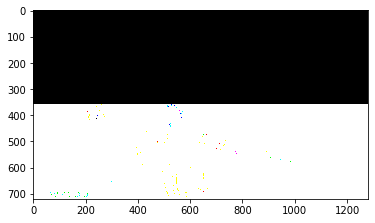

In [0]:
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

# Images to video

In [0]:
#https://www.geeksforgeeks.org/python-create-video-using-multiple-images-using-opencv/


import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= '/content/drive/My Drive/Untitled folder/detected_images/'
pathOut = '/content/drive/My Drive/Untitled folder/video.avi'
fps = 1/25
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

In [0]:
# importing libraries 
import os 
import cv2 
from PIL import Image 

# Checking the current directory path 
print(os.getcwd()) 

# Folder which contains all the images 
# from which video is to be generated 
os.chdir("/content/drive/My Drive/Untitled folder/detected_images") 
path = "/content/drive/My Drive/Untitled folder/detected_images"

mean_height = 0
mean_width = 0

num_of_images = len(os.listdir('/content/drive/My Drive/Untitled folder/detected_images')) 
# print(num_of_images) 

for file in os.listdir('/content/drive/My Drive/Untitled folder/detected_images'): 
	im = Image.open(os.path.join(path, file)) 
	width, height = im.size 
	mean_width += width 
	mean_height += height 
	# im.show() # uncomment this for displaying the image 

# Finding the mean height and width of all images. 
# This is required because the video frame needs 
# to be set with same width and height. Otherwise 
# images not equal to that width height will not get 
# embedded into the video 
mean_width = int(mean_width / num_of_images) 
mean_height = int(mean_height / num_of_images) 

# print(mean_height) 
# print(mean_width) 

# Resizing of the images to give 
# them same width and height 
for file in os.listdir('.'): 
	if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"): 
		# opening image using PIL Image 
		im = Image.open(os.path.join(path, file)) 

		# im.size includes the height and width of image 
		width, height = im.size 
		#print(width, height) 

		# resizing 
		imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS) 
		imResize.save( file, 'JPEG', quality = 95) # setting quality 
		# printing each resized image name 
		#print(im.filename.split('\\')[-1], " is resized") 


# Video Generating function 
def generate_video(): 
	image_folder = '/content/drive/My Drive/Untitled folder/detected_images' # make sure to use your folder 
	video_name = 'mygeneratedvideo1.avi'
	os.chdir("/content/drive/My Drive/Untitled folder/") 
	
	images = [img for img in os.listdir(image_folder) 
			if img.endswith(".jpg") or
				img.endswith(".jpeg") or
				img.endswith("png")] 
	
	# Array images should only consider 
	# the image files ignoring others if any 
	#print(images) 

	frame = cv2.imread(os.path.join(image_folder, images[0])) 

	# setting the frame width, height width 
	# the width, height of first image 
	height, width, layers = frame.shape 

	video = cv2.VideoWriter(video_name, 0, 25, (width, height)) 

	# Appending the images to the video one by one 
	for image in images: 
		video.write(cv2.imread(os.path.join(image_folder, image))) 
	
	# Deallocating memories taken for window creation 
	cv2.destroyAllWindows() 
	video.release() # releasing the video generated 


# Calling the generate_video function 
generate_video() 


/content/drive/My Drive/Untitled folder
